# Project 2:  Holiday weather

by Charalampos Spanias, 24 October 2021.

This is the project notebook for the second part of The Open University's _Learn to code for Data Analysis_ course.

There is nothing I like better than taking a holiday. In the winter I like to have a two week break in a country where I can be guaranteed sunny dry days. In the summer I like to have two weeks off relaxing in my garden in Edinburgh. However I'm often disappointed because I pick a fortnight when the weather is dull and it rains. So in this project I am going to use the historic weather data from the Weather Underground for Delhi to try to predict two good weather weeks to take off as holiday next summer. Of course the weather in the summer of 2022 may be very different to 2014 but it should give me some indication of when would be a good time to take a summer break.

## Getting the data

Weather Underground keeps historical weather data collected in many airports around the world. Right-click on the following URL and choose 'Open Link in New Window' (or similar, depending on your browser):

http://www.wunderground.com/history

_(The following instructions were correct as of 2017. Wunderground has since changed its data provision.)_

When the new page opens start typing 'LHR' in the 'Location' input box and when the pop up menu comes up with the option 'LHR, United Kingdom' select it and then click on 'Submit'. 

When the next page opens with London Heathrow data, click on the 'Custom' tab and select the time period From: 1 January 2014 to: 31 December 2014 and then click on 'Get History'. The data for that year should then be displayed further down the page. 

You can copy each month's data directly from the browser to a text editor like Notepad or TextEdit, to obtain a single file with as many months as you wish.

Weather Underground has changed in the past the way it provides data and may do so again in the future. 
I have therefore collated the whole 2014 data in the provided 'Delhi_DEL_2014.csv' file. 

Now load the CSV file into a dataframe making sure that any extra spaces are skipped:

In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from pandas import *
from datetime import datetime

delhi = read_csv(r"E:\Current Studies\OpenLearn\Learn to Code for Data Analysis\2_Cleaning_up_our_act\Delhi_DEL_2014.csv", skipinitialspace=True)

## Cleaning the data
First we need to clean up the data. I'm not going to make use of `'WindDirDegrees'` in my analysis, but you might in yours so we'll rename `'WindDirDegrees< br />'` to `'WindDirDegrees'`. 

In [2]:
delhi.head()
delhi.shape
delhi.columns
delhi.dtypes

Date                           object
Max TemperatureC                int64
Mean TemperatureC               int64
Min TemperatureC                int64
Dew PointC                      int64
MeanDew PointC                  int64
Min DewpointC                   int64
Max Humidity                    int64
Mean Humidity                   int64
Min Humidity                    int64
Max Sea Level PressurehPa       int64
Mean Sea Level PressurehPa      int64
Min Sea Level PressurehPa       int64
Max VisibilityKm                int64
Mean VisibilityKm               int64
Min VisibilitykM                int64
Max Wind SpeedKm/h              int64
Mean Wind SpeedKm/h             int64
Max Gust SpeedKm/h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees<br />           object
dtype: object

In [3]:
delhi = delhi.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

remove the  `< br />`  html line breaks from the values in the `'WindDirDegrees'` column. 

In [4]:
delhi['WindDirDegrees'] = delhi['WindDirDegrees'].str.rstrip('<br />')

and change the values in the `'WindDirDegrees'` column to `float64`:

In [5]:
delhi['WindDirDegrees'] = delhi['WindDirDegrees'].astype('float64')

We definitely need to change the values in the `'Date'` column into values of the `datetime64`  date type.

In [6]:
delhi['Date'] = to_datetime(delhi['Date'])

We also need to change the index from the default to the `datetime64` values in the `'Date'` column so that it is easier to pull out rows between particular dates and display more meaningful graphs: 

In [7]:
delhi.index = delhi['Date']

## Finding a summer break

According to meteorologists, summer extends for the whole months of June, July, and August in the northern hemisphere and the whole months of December, January, and February in the southern hemisphere. So as I'm in the northern hemisphere I'm going to create a dataframe that holds just those months using the `datetime` index, like this:

In [8]:
summer = delhi.loc[datetime(2014,6,1) : datetime(2014,8,31)]

I now look for the days with warm temperatures.

In [9]:
summer[summer['Mean TemperatureC'] >= 30]

,Date,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-08-20,2014-08-20,36,30,23,16,8,4,46,22,11,...,11,10,10,23,11,NaN,6.1,3.0,Rain-Thunderstorm,181.0


Summer 2014 was rather cool in Delhi: there is just 1 day with temperatures of 30 Celsius or higher. Best to see a graph of the temperature and look for the warmest period.

So next we tell Jupyter to display any graph created inside this notebook:

In [10]:
%matplotlib inline

Now let's plot the `'Mean TemperatureC'` for the summer:

<AxesSubplot:xlabel='Date'>

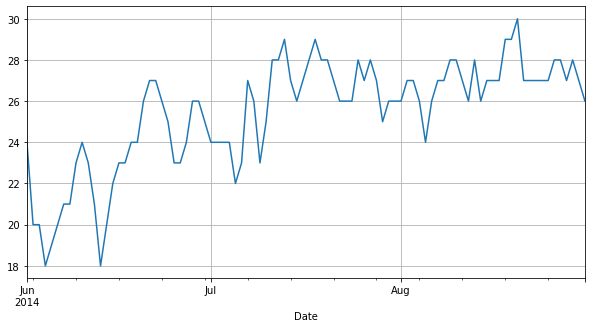

In [11]:
summer['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

Well looking at the graph the second half of July until the end of August looks good for mean temperatures over 25 degrees C so let's also put precipitation on the graph too:

<AxesSubplot:xlabel='Date'>

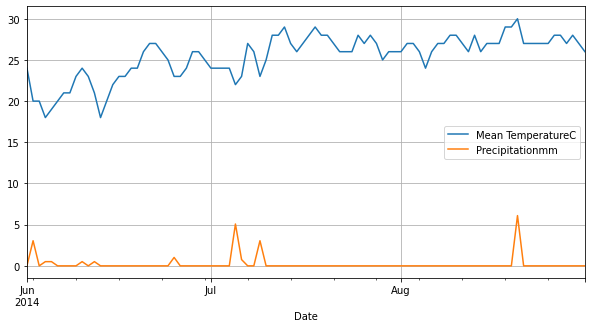

In [12]:
summer[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

The period between the second half of July and the first half of August is looking good, with no peaks showing heavy rain. Let's have a closer look by just plotting mean temperature and precipitation for this period.  

<AxesSubplot:xlabel='Date'>

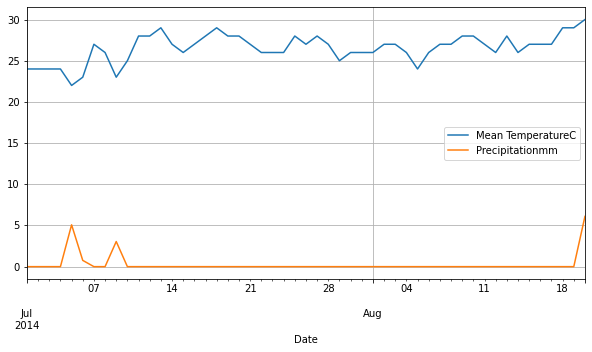

In [13]:
july = summer.loc[datetime(2014,7,1) : datetime(2014,8,20)]
july[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

Yes, the period between the 10th of July and the 19th of August looks pretty good, no days that have significant rain and temperature is more than 25 degrees Celsius at, almost, all days (5th of August is the exception with temperature of ~ 24 degrees Celsius)!

## Conclusions

The graphs have shown the beauty of the Indian summer, with temperatures close to 25 degrees of Celsius and almost no rain for most of the summer period. During the period between mid-July and mid-August in 2004 the weather was ideal, i.e. hot and dry. Of course this is no guarantee that the weather pattern will repeat itself in future years. To make a sensible prediction we would need to analyse the summers for many more years. By the time you have finished this course you should be able to do that.